<a href="https://colab.research.google.com/github/mhaidar10/machine-leaning-pemula-dc/blob/main/05_Tensorflow/01_Latihan_Membuat_Model_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tujuan**

latihan ini akan membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan.



Dataset yang digunakan memiliki 192 sampel data latih yang terdiri dari 96 sampel gambar ruangan rapi dan 96 sampel gambar ruangan berantakan.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [2]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-10-23 23:41:13--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  --.-KB/s    in 0.1s    

2023-10-23 23:41:13 (452 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
os.listdir('/tmp/images/val')

['clean', 'messy']

# **Kode berikut menunjukkan proses augmentasi gambar pada setiap sampel di dataset.**

Augmentasi gambar merupakan sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar yang telah ada dengan menambahkan variasi tertentu.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

Siapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam memori melalui fungsi flow()

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


membangun model Convolutional Neural Network (CNN).

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

menggunakan fungsi summary() untuk melihat summary dari arsitektur model yang telah kita buat.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

melakukan compile model menggunakan fungsi compile()

In [10]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# **melakukan model fitting**

merupakan proses untuk melatih model pada data masukan dan label yang bersesuaian

Hal yang harus didefinisikan pada tahap ini adalah loss function dan optimizer. Kemudian,mulai proses pelatihan model dengan memanggil fungsi fit().

Dengan menggunakan ImageDataGenerator, kita tidak perlu memasukkan parameter gambar dan labelnya. Image data generator secara otomatis melabeli gambar sesuai dengan direktorinya. Sebagai contoh,  sebuah gambar yang terdapat di direktori clean, akan diberi label “clean” oleh ImageDataGenerator secara otomatis.

In [11]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 20s - loss: 0.8038 - accuracy: 0.4700 - val_loss: 0.6936 - val_accuracy: 0.5000 - 20s/epoch - 807ms/step
Epoch 2/20
25/25 - 1s - loss: 0.6947 - accuracy: 0.5400 - val_loss: 0.6901 - val_accuracy: 0.7500 - 1s/epoch - 43ms/step
Epoch 3/20
25/25 - 1s - loss: 0.7011 - accuracy: 0.6100 - val_loss: 0.6950 - val_accuracy: 0.5000 - 1s/epoch - 43ms/step
Epoch 4/20
25/25 - 1s - loss: 0.6927 - accuracy: 0.5100 - val_loss: 0.6795 - val_accuracy: 0.6500 - 1s/epoch - 44ms/step
Epoch 5/20
25/25 - 1s - loss: 0.6910 - accuracy: 0.5300 - val_loss: 0.6537 - val_accuracy: 0.5000 - 1s/epoch - 60ms/step
Epoch 6/20
25/25 - 1s - loss: 0.6573 - accuracy: 0.5900 - val_loss: 0.5759 - val_accuracy: 0.8000 - 1s/epoch - 42ms/step
Epoch 7/20
25/25 - 1s - loss: 0.7297 - accuracy: 0.6500 - val_loss: 0.6581 - val_accuracy: 0.6500 - 1s/epoch - 41ms/step
Epoch 8/20
25/25 - 1s - loss: 0.6882 - accuracy: 0.5900 - val_loss: 0.6449 - val_accuracy: 0.7000 - 1s/epoch - 42ms/step
Epoch 9/20
25/25 - 1s - loss:

menguji model tersebut untuk memprediksi gambar baru (gambar yang belum dikenal oleh model sebelumnya)

Saving pngtree-an-messy-bedroom-with-a-bed-full-of-trash-and-dishes-image_2684023.jpg to pngtree-an-messy-bedroom-with-a-bed-full-of-trash-and-dishes-image_2684023.jpg
1/1 [==============================] - 0s 20ms/step
pngtree-an-messy-bedroom-with-a-bed-full-of-trash-and-dishes-image_2684023.jpg
messy


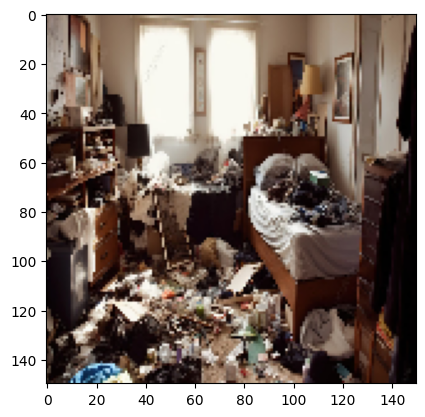

In [15]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')